In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 77 kB 3.9 MB/s 
     |████████████████████████████████| 40 kB 5.1 MB/s 
  Attempting uninstall: packaging
    Found existing installation: packaging 21.3
    Uninstalling packaging-21.3:
      Successfully uninstalled packaging-21.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [ ]:
train_dir = Path('/content/drive/MyDrive/dataset/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

val_dir = Path('/content/drive/MyDrive/dataset/validation')
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

test_dir = Path('/content/drive/MyDrive/dataset/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [ ]:
def image_processing(filepath):

  labels = [str(filepath[i]).split('/')[-2] \
            for i in range(len(filepath))]

  filepath = pd.Series(filepath, name='Filepath').astype(str)
  labels = pd.Series(labels, name='Label')

  df = pd.concat([filepath, labels], axis = 1)
  df = df.sample(frac=1).reset_index(drop=True)
  return df

In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 847

Number of different labels: 7

Labels: ['timun' 'susu' 'telur' 'roti' 'nasi putih' 'ayam goreng' 'tomat']


In [ ]:
train_df.head(7)

,Filepath,Label
0,/content/drive/MyDrive/dataset/train/timun/ (6...,timun
1,/content/drive/MyDrive/dataset/train/timun/ (2...,timun
2,/content/drive/MyDrive/dataset/train/susu/ (31...,susu
3,/content/drive/MyDrive/dataset/train/telur/ (8...,telur
4,/content/drive/MyDrive/dataset/train/roti/ (69...,roti
5,/content/drive/MyDrive/dataset/train/nasi puti...,nasi putih
6,/content/drive/MyDrive/dataset/train/ayam gore...,ayam goreng


KeyError: ignored

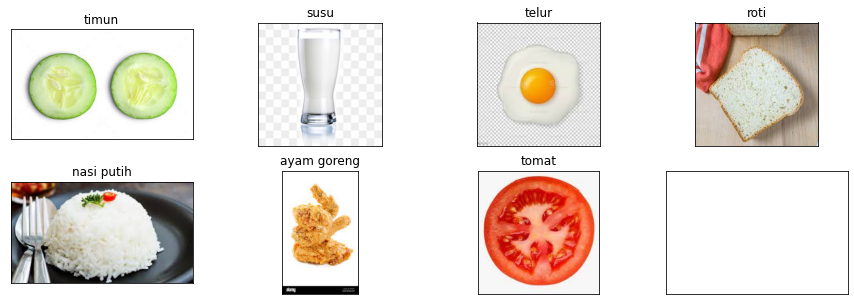

In [ ]:
df_unique = train_df.copy().drop_duplicates(subset=['Label']).reset_index()

#display some pictures
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,5),
                        subplot_kw={'xticks':[], 'yticks':[]})
#fig.delaxes(axes[1,3])

for i, ax in enumerate(axes.flat):
  ax.imshow(plt.imread(df_unique.Filepath[i]))
  ax.set_title(df_unique.Label[i], fontsize=12)

plt.tight_layout(pad=0.5)
plt.show()  

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_images = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_images = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_images = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

AttributeError: ignored

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(42, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')  
])


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 42)        6090      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 42)      

In [ ]:
epochs = 15
batch_size = 32

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(
                   monitor='val_loss',
                   patience=5,
                   restore_best_weights=True)
    ])

Epoch 1/15
27/27 [==============================] - 42s 2s/step - loss: 1.5569 - accuracy: 0.4439 - val_loss: 1.0884 - val_accuracy: 0.6032
Epoch 2/15
27/27 [==============================] - 42s 2s/step - loss: 0.8710 - accuracy: 0.7048 - val_loss: 0.8767 - val_accuracy: 0.6984
Epoch 3/15
27/27 [==============================] - 40s 1s/step - loss: 0.6377 - accuracy: 0.7922 - val_loss: 0.7524 - val_accuracy: 0.7619
Epoch 4/15
27/27 [==============================] - 44s 2s/step - loss: 0.4654 - accuracy: 0.8418 - val_loss: 0.6253 - val_accuracy: 0.8016
Epoch 5/15
27/27 [==============================] - 41s 1s/step - loss: 0.3565 - accuracy: 0.8760 - val_loss: 0.7108 - val_accuracy: 0.7831
Epoch 6/15
27/27 [==============================] - 41s 2s/step - loss: 0.2661 - accuracy: 0.9162 - val_loss: 0.6098 - val_accuracy: 0.8228
Epoch 7/15
27/27 [==============================] - 41s 2s/step - loss: 0.2344 - accuracy: 0.9315 - val_loss: 0.6106 - val_accuracy: 0.8413
Epoch 8/15
27/27 [==

Text(0.5, 1.0, 'Training and validation loss')

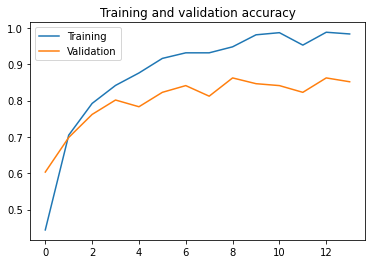

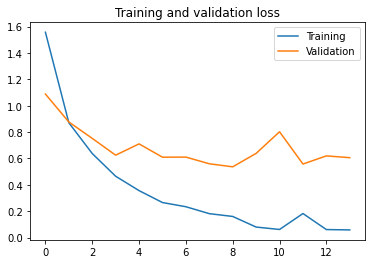

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot( epochs, acc, label='Training')
plt.plot( epochs, val_acc, label='Validation')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot( epochs,     loss, label='Training')
plt.plot( epochs, val_loss, label='Validation')
plt.legend()
plt.title('Training and validation loss')

In [ ]:
saved_model_path = "/content/drive/MyDrive/models/Cal.h5"
model.save(saved_model_path)

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    {saved_model_path} \
    "/content/drive/MyDrive/models"

In [ ]:
predict = model.predict(test_images)
predict = np.argmax(predict, axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
predict1 = [labels[k] for k in predict]

predict1

['nasi putih',
 'nasi putih',
 'nasi putih',
 'tomat',
 'nasi putih',
 'nasi putih',
 'timun',
 'tomat',
 'nasi putih',
 'timun',
 'roti',
 'telur',
 'susu',
 'roti',
 'ayam goreng',
 'ayam goreng',
 'ayam goreng',
 'roti',
 'ayam goreng',
 'roti',
 'nasi putih',
 'susu',
 'nasi putih',
 'telur',
 'roti',
 'nasi putih',
 'timun',
 'susu',
 'ayam goreng',
 'susu',
 'ayam goreng',
 'nasi putih',
 'nasi putih',
 'telur',
 'tomat',
 'ayam goreng',
 'ayam goreng',
 'timun',
 'telur',
 'susu',
 'ayam goreng',
 'susu',
 'nasi putih',
 'telur',
 'telur',
 'nasi putih',
 'ayam goreng',
 'nasi putih',
 'ayam goreng',
 'nasi putih',
 'timun',
 'tomat',
 'nasi putih',
 'nasi putih',
 'ayam goreng',
 'roti',
 'telur',
 'nasi putih',
 'roti',
 'susu',
 'timun',
 'tomat',
 'ayam goreng',
 'telur',
 'tomat',
 'susu',
 'telur',
 'tomat',
 'tomat',
 'telur',
 'telur',
 'susu',
 'susu',
 'nasi putih',
 'telur',
 'nasi putih',
 'tomat',
 'susu',
 'ayam goreng',
 'timun',
 'nasi putih',
 'susu',
 'tomat']

In [ ]:
def output(location):
  img = load_img(location, target_size=(224,224,3))
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img, [0])
  answer = model.predict(img)
  y_class = answer.argmax(axis=-1)
  y = ' '.join(str(x) for x in y_class)
  y = int(y)
  result = labels[y]
  return result

In [ ]:
from google.colab import files
files.upload()

Saving telurgoreng.jpg to telurgoreng (1).jpg


{'telurgoreng.jpg': b'RIFFrX\x00\x00WEBPVP8 fX\x00\x00\x10\xd8\x01\x9d\x01*\x80\x02\x80\x02>m4\x96I$"\xac\xaa\xa3\x10\xf9\xe1\x90\r\x89en\xce\xaf~ @\xb9\xf3\xe8\xfc\x9a\x931p\xf0\xfc\xf3\x98\x9f-\xb9\xa7#\x17+\x9a\xee\xbf\xeby\xfarO\x86_`\x92\x0b\xc4\x9e\xb7\xd3\'\x98\xa7B\xbf9\x1ee:|=\n~\xb1\xf6\xab\x9ea\xd8_\xe6\xbbH\x02S\xe6\xbes{\x83\xfa\xd3\xa8\xa4\n\xdd\x0b\x9b\xef\xcd\xb4\x1be\xdf\xf9\x9fP?\xe8^\x93?\xf9\xf9-\xfd\xbf\xfe\xf7\xb0?J?\xdf\x0fda\xd9\xfc%\x9cH\xb3}8\xf8\'\xd5\xc5\x1a+\x84\xb3\x89\x16o\xa7\x1f\x04\xfa\xb8\xa3Ep\x96q"\xcd\xf4\xe3\xe0\x9fW\x14h\xae\x12\xce$Y\xbe\x9c|\x13\xea\xe2\x8d\x15\xc2Y\xc4\x8b7\xd3\x8f\x82}\\Q\xa2\xb8K8\x91g\x1b$pQ0\xb3}8\xf8\'\xd5\xc5\x1a+\x84\xb3\x89\x16m\xed\x9f\x1d\xac\xaa\xe7q\xdb\x1a\xf8\x06\xf6:\x9c\xa1Y,\xc1hm6\xc9\x0b\x9e\xafY\xad\x84VG\xad\xa7\xa6}\x06\x8d8p] `\xab9\xe1\xfb\x1d\xc5\x92\x02\xe8FJ\x08\xf8\'\xd5\xc5\x1a+\x84\xb3\x89\x15t\x83\xf7\xd3X\xb9\xe6\x92\x9b\x19J\xf2YOl\xeb\r\x071|g:\xac\xc4\x88X\xa9\x7f\x05\xcb\x02$\xcai\x98^Nk\xa5

In [ ]:
img = output('telurgoreng.jpg')
img

'telur'